In [1]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze
from datascienceutils import clusteringModels as cm

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random


from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook(bokeh.resources.INLINE)


Loading BokehJS ...

In [2]:
import os
files = ['sub1.txt', 'sub2.txt', 'sub3.txt', 'sub4.txt', 'sub5.txt', 
         'sub6.txt', 'sub7.txt', 'sub8.txt', 'sub9.txt', 'sub10.txt']
dataframes = dict()
for i, file in enumerate(files):
    dataframes[i] = pd.read_csv(os.path.join('~/DataScientist/interviews/terablu_xt/data', file), 
                                            delimiter='\t', names=["nSeq", "DI", "CH1", "CH2"])


In [3]:
irisDf= dataframes[0]

In [4]:
dataframes[0].describe()

nSeq        DI            CH1            CH2
count  311175.000000  311175.0  311175.000000  311175.000000
mean   155587.000000       0.0    8987.818520   24431.247835
std     89828.629345       0.0    2508.160894    9030.343826
min         0.000000       0.0    3487.000000     197.000000
25%     77793.500000       0.0    7282.000000   17742.000000
50%    155587.000000       0.0    9188.000000   23348.000000
75%    233380.500000       0.0   11034.000000   30273.000000
max    311174.000000       0.0   15437.000000   65372.000000

In [5]:
irisDf.head()

nSeq  DI   CH1    CH2
0     0   0  3831  28503
1     1   0  4023  27809
2     2   0  3836  27793
3     3   0  3980  27600
4     4   0  3936  26736

In [6]:
irisDf.var()

nSeq    8.069183e+09
DI      0.000000e+00
CH1     6.290871e+06
CH2     8.154711e+07
dtype: float64

In [7]:
irisDf.skew()

nSeq   -3.056514e-16
DI      0.000000e+00
CH1    -4.449270e-01
CH2     4.021021e-01
dtype: float64

In [8]:
irisDf.corr()

nSeq  DI       CH1       CH2
nSeq  1.000000 NaN  0.885959 -0.557394
DI         NaN NaN       NaN       NaN
CH1   0.885959 NaN  1.000000 -0.490140
CH2  -0.557394 NaN -0.490140  1.000000

In [9]:
## Hmm... Looks like there's no correlation between CH1 and CH2.. surprising or may be not.. may be there's a ground - line relationship btw them
## also interestingly fairly strong correlation between nSeq and CH1... since nSeq is time, perhaps there's a continuous increase in CH1 signal 
## throughout the time the subject wore it??


In [10]:
irisDf.select_dtypes(include=[np.number]).columns

Index(['nSeq', 'DI', 'CH1', 'CH2'], dtype='object')

In [11]:
#analyze.correlation_analyze(irisDf, 'nSeq', 'CH1')

Subject no: 1
Variance of CH1
6290871.06915
Skewness of CH1
-0.44492695591
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 5066.857555 
 p-value: 0.000000



/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


Subject no: 2
Variance of CH1
1606058.81209
Skewness of CH1
1.37458683421
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 10225.157206 
 p-value: 0.000000



Subject no: 3
Variance of CH1
2377843.54997
Skewness of CH1
0.473169421278
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 1541.225809 
 p-value: 0.000000



Subject no: 4
Variance of CH1
4240122.03935
Skewness of CH1
0.156548351535
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 3000.784711 
 p-value: 0.000000



Subject no: 5
Variance of CH1
1467309.2213
Skewness of CH1
-0.154166525807
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 657.873257 
 p-value: 0.000000



Subject no: 6
Variance of CH1
1934979.22537
Skewness of CH1
-0.0105764400501
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 1092.930371 
 p-value: 0.000000



Subject no: 7
Variance of CH1
250999.27213
Skewness of CH1
0.781118827085
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 12296.213639 
 p-value: 0.000000



Subject no: 8
Variance of CH1
107869.375257
Skewness of CH1
0.47169531627
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 6184.648765 
 p-value: 0.000000



Subject no: 9
Variance of CH1
80798200.7265
Skewness of CH1
-0.307980996252
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 1328.849563 
 p-value: 0.000000



Subject no: 10
Variance of CH1
3288839.8153
Skewness of CH1
0.314038744258
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)
Anderson-Darling normality test on CH1 
Statistic: 7523.828770 
 p-value: 0.000000



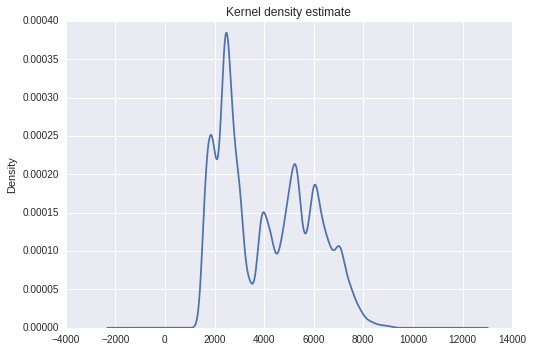

In [12]:
for i, df in dataframes.items():
    print("Subject no: %s"%str(i+1))
    plotter.show(analyze.dist_analyze(df, 'CH1'))

Variance of CH1
6290871.06915
Skewness of CH1
-0.44492695591
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=1.0, pvalue=0.0)


/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


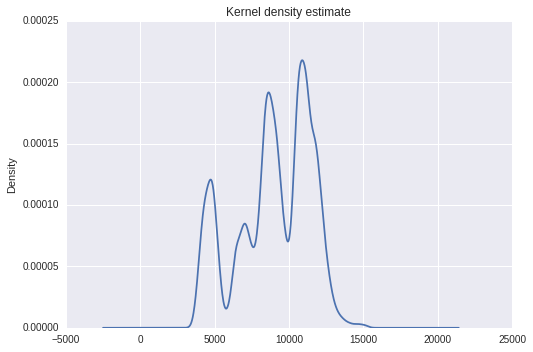

In [13]:
plotter.show(analyze.dist_analyze(irisDf, 'CH1', is_normal=False,))

In [ ]:
## Interesting.. the channel measurements are almost normal.. a bit skewed... and there's a close second mode
## Wonder if the 2nd mode is likely to be an indicator of epileptic propensity.. (Should compare against normal subjects)

## The test statistic says  it is resoundingly from a normal distribution (from [here](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test#Test_for_normality))

In [ ]:
plotter.show(analyze.dist_analyze(irisDf, 'nSeq', 'CH1'))

Variance of nSeq
8069182650.0
Skewness of nSeq
0.0
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.99998364521956173, pvalue=0.0)

In [ ]:
plotter.show(analyze.fractal_analyze(irisDf, 'CH1'))